<h1 style="color:#1E90FF; font-weight:bold;">Jump2Digital Hackathon</h1>
<h2 style="color:#1E90FF; font-weight:bold;">Pablo Ruiz Lopez</h2>

# Exploratory Data Analysis: Unveiling the Dynamics of Barcelona's Rent and Noise Levels

Welcome to our exploratory data analysis project where we delve into the intricate relationship between rental prices and noise pollution across the vibrant districts of Barcelona. This project is structured to guide you through an examination of datasets, extracting meaningful insights, and visualizing the underlying patterns that define urban life in this bustling city.

<div style="text-align: center;">
    <img src="https://api.time.com/wp-content/uploads/2023/03/Worlds-Greatest-Places-Barcelona-Spain.jpg" width="500">
</div>

### 1.1 Introduction<a id='1.2_Introduction'></a>

Barcelona, a city renowned for its rich cultural heritage and architectural marvels, also grapples with the contemporary urban challenges of housing affordability and environmental noise. In this analysis, we aim to scrutinize the multifaceted aspects of Barcelona's residential landscape, focusing on the subtleties of rental market trends and noise distribution. Through a series of data manipulation techniques and graphical interpretations, we will uncover how these factors interplay within the city's unique neighborhoods.

This journey through data will be powered by data ingestion methodologies, including real-time API consumption and the parsing of CSV files. By leveraging these techniques, we are able to construct a robust dataset that reflects the current state of Barcelona's rental and noise situation.

Embark on this data-driven journey with us as we harness the power of Python libraries to fetch, process, and analyze datasets. Our goal is to provide an understanding of Barcelona's housing dynamics while placing a spotlight on the silent yet significant aspect of urban noise and its possible correlation with rent prices.

As we unfold the chapters of this analysis, we will employ a variety of data acquisition methods, engage in data cleaning, and apply statistical models to distill complex information into accessible insights. Graphical representations will serve as a cornerstone of our exploration, revealing patterns and anomalies that might otherwise remain hidden in the raw numerical data.

Join us as we traverse through the layers of data and contribute to the ongoing conversation about urban development, quality of life, and sustainability in Barcelona.

Let's begin by setting up our working environment with the necessary imports, acquiring the data that will form the foundation of our analysis, and stepping into the world of Barcelona's data tapestry through API endpoints and CSV data streams.

[Proceed to Contents](#Contents)

### Contents<a id='Contents'></a>
* [1 Exploratory Data Analysis: Barcelona](#Contents)
  * [1.1 Introduction](#1.2_Introduction)
  * [1.2 Contents](#Contents)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Data Acquisition](#1.4_Load_The_Data)
    * [1.4.1 Helper Function for API Consupmtion](#1.4.1_Helper)
    * [1.4.2 Reading and Processing `Lloguer_preu_trim.csv`](#1.4.2_llpt)
    * [1.4.3 Concatenating Multiple DataFrames from API Responses](#1.4.3_capiresp)
    * [1.4.4 Analysis of `Lloguer_preu_trim` Dataset](#1.4.4_EDAllpt)
      * [1.4.4.1 Dealing with 'NA' Values in `Preu` Column](#1.4.4.1_dnapreu)
    * [1.4.5 Reading the Noise Dataset `2017_Poblacio_exposada_barris... .csv`](#1.4.5_red_noise_data)
    * [1.4.6 Analysis of the Noise Dataset](#1.4.6analysis_noise_data)
    * [1.4.7 Converting 'Valor' Values from Percentage to Float](#1.4.7_value_conversion)
    * [1.4.8 Eliminating the 0.0 Values in Noise Column Due to Irrelevancy](#1.4.8_zero_values_irr)
  * [1.5 Merging Data: Rent and Price Datasets](#1.5_merging_data_r_n)
    * [1.5.1 Analysis of the Merged Dataset](#1.5.1analysis_merged_data)
    * [1.5.2 Pivoting Tables for Better Analysis and Dimensional Insight](#1.5.2_pivoting_merged)
    * [1.5.3 Analysis of the Pivoted Dataset](#1.5.3analysis_pivoted_data)
    * [1.5.4 Creating Two Dataframes Based on the `Lloguer_mitja` Column](#1.5.4_two_dataframes)
  * [1.6 Graphical Analysis (Plots)](#1.6_graph_analysis)
    * [1.6.1 Plotting Noise Distribution](#1.6.1_plot1)
    * [1.6.2 Noise Level vs Rent Price](#1.6.2_plot2)
  * [1.7 Principal Component Analysis (PCA)](#1.7_PCA)
    * [1.7.1 Selecting Relevant Columns for PCA](#1.7.1_PCA1)
    * [1.7.2 Dealing With Categorical and Numerical Features](#1.7.2_cat_num)
    * [1.7.3 Standarizing the Features](#1.7.3_stan_feat)
    * [1.7.4 Performing the PCA and Plotting Principal Components](#1.7.4_PCA_comp)
  * [1.8 Analysis of PCA Plot](#1.8_PCA_ana)
  * [1.9 Future Work](#1.9_future_work)

### 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Magic commands for visualization
%matplotlib inline

### 1.4 Data Acquisition<a id='1.4_Load_The_Data'></a>

In this phase of the project, our objective is to access and import the `Lloguer_preu_trim.csv` file via the provided API. We will develop a utility function designed to streamline the retrieval process and facilitate the importation of data into a pandas DataFrame. 

Preliminary exploration of the source indicates that the dataset encompasses approximately 600 records in year 2017, distributed across multiple URLs as dictated by the official Barcelona City Adjuntament portal. To efficiently capture the entirety of the dataset, we will tailor our data acquisition method to accommodate this segmented delivery format.

#### 1.4.1 Helper Function for API Consuption<a id='1.4.1_Helper'></a>

A dedicated function to interface with the API, handling requests and responses.

In [2]:
def fetch_data(url: str):
    '''
    Fetches data from the provided URL and converts it into a pandas DataFrame.
    
    This function makes an HTTP GET request to the specified URL. If the request is successful (HTTP status code 200),
    it will parse the JSON response and convert the 'records' key into a DataFrame. If the request fails,
    it prints an error message with the failed status code and returns an empty DataFrame.
    
    Parameters:
        url (str): The URL from which to fetch the data.
    
    Returns:
        tuple:
            DataFrame (pd.DataFrame): DataFrame containing the data from the 'records' key if the request is successful.
            JSON Request (json): The complete JSON data received from the request.
            Empty DataFrame (pd.DataFrame): If the request fails, it returns an empty DataFrame and None.
    '''
    
    # HTTP request to the URL
    response = requests.get(url)
    
    # Checking a successful request
    if response.status_code == 200:
        data = response.json()
        # Creating a DataFrame from the 'records' key in the JSON
        return pd.DataFrame(data['result']['records']), data
    else:
        # If the request fails
        print(f"Failed to retrieve data: {response.status_code}")
        # Returning an empty DataFrame
        return pd.DataFrame(), None


#### 1.4.2 Reading and Processing `Lloguer_preu_trim.csv`<a id='1.4.2_llpt'></a>

We will integrate the dataset detailing average monthly rent costs (€/month) and per square meter (€/m2) in Barcelona, beginning with the initial URL. Subsequently, we will iterate through an additional five URLs specified in the JSON response to compile the complete 2017 data.

In [3]:
# The initial URL for the first 100 records
url_start = 'https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=0a71a12d-55fa-4a76-b816-4ee55f84d327'
dataframes = []  # A list to store individual DataFrames

# Fetching the initial data
df_preu_initial, data = fetch_data(url_start)
dataframes.append(df_preu_initial)

#### 1.4.3 Concatenating Multiple DataFrames from API Responses<a id='1.4.3_capiresp'></a>

The API limits data retrieval to 100 records per call. Implemented looping mechanism to access all 584 records from 2017 by following paginated links.

In [4]:
i = 0
# Using the '_links' key in the data to find the URL for the next page of data
while i < 5:
    i += 1
    next_url = 'https://opendata-ajuntament.barcelona.cat/data{}'.format(data['result']['_links']['next'])

    # Fetching the next page of data
    df_preu_next, data = fetch_data(next_url)
    if df_preu_next.empty:
        break  # If no data is returned or an error occurred
    
    # Appending DataFrame read into a list
    dataframes.append(df_preu_next)
    df_initial = df_preu_next 


In [5]:
# Concatenating all DataFrames into one from list
df_preu_final = pd.concat(dataframes, ignore_index=True)

#### 1.4.4 Analysis of `Lloguer_preu_trim` Dataset<a id='1.4.4_EDAllpt'></a>

Performing EDA to uncover patterns, anomalies, relationships, and trends within the `Lloguer_preu_trim` dataset.

In [6]:
# Exploring dataset defined schema
data['result']['fields']

[{'type': 'int4', 'id': '_id'},
 {'type': 'numeric', 'id': 'Any'},
 {'type': 'numeric', 'id': 'Trimestre'},
 {'type': 'numeric', 'id': 'Codi_Districte'},
 {'type': 'text', 'id': 'Nom_Districte'},
 {'type': 'numeric', 'id': 'Codi_Barri'},
 {'type': 'text', 'id': 'Nom_Barri'},
 {'type': 'text', 'id': 'Lloguer_mitja'},
 {'type': 'text', 'id': 'Preu'}]

In [7]:
df_preu_final.head()

,Codi_Districte,Lloguer_mitja,Nom_Districte,Trimestre,Preu,Nom_Barri,Codi_Barri,_id,Any
0,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,734.99,el Raval,1,1,2017
1,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,905.26,el Barri Gòtic,2,2,2017
2,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,722.78,la Barceloneta,3,3,2017
3,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,895.28,"Sant Pere, Santa Caterina i la Ribera",4,4,2017
4,2,Lloguer mitjà mensual (Euros/mes),Eixample,1,871.08,el Fort Pienc,5,5,2017


In [8]:
df_preu_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  584 non-null    object
 1   Lloguer_mitja   584 non-null    object
 2   Nom_Districte   584 non-null    object
 3   Trimestre       584 non-null    object
 4   Preu            584 non-null    object
 5   Nom_Barri       584 non-null    object
 6   Codi_Barri      584 non-null    object
 7   _id             584 non-null    int64 
 8   Any             584 non-null    object
dtypes: int64(1), object(8)
memory usage: 41.2+ KB


We can observe that columns intended for numerical values are not specified as numeric type on the JSON reply; therefore, a schema transformation is necessary due to inadequate formatting in the JSON file. However, before taking this step, let's explore the data further.

To ensure data integrity before performing transformations and operations, it's prudent to review the unique entries for each variable, thereby informing the appropriate data type assignment.

In [9]:
# Printing unique values per column
for column in df_preu_final.columns:
    print(f'\n<-- {column} -->')
    print(df_preu_final[column].unique())


<-- Codi_Districte -->
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10']

<-- Lloguer_mitja -->
['Lloguer mitjà mensual (Euros/mes)'
 'Lloguer mitjà per superfície (Euros/m2 mes)']

<-- Nom_Districte -->
['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']

<-- Trimestre -->
['1' '2' '3' '4']

<-- Preu -->
['734.99' '905.26' '722.78' '895.28' '871.08' '847.04' '1151.09' '1001.49'
 '909.08' '876.97' '715.71' 'NA' '689.16' '806.34' '680.17' '739.35'
 '697.58' '737.27' '936.32' '896.45' '1856.57' '1248' '1291.5' '1516.52'
 '1182.12' '1268.61' '913.45' '946.59' '687.42' '841.38' '837.09' '839.29'
 '743.88' '637.3' '722.67' '812.93' '597.09' '663.9' '622.33' '716.43'
 '816.05' '669.89' '687.37' '654.58' '587.02' '634.54' '689.62' '504.31'
 '595.48' '624.58' '540.68' '418.07' '459.19' '497.84' '622.82' '708.6'
 '575.23' '696.04' '716.78' '756.57' '774.97' '850.73' '1108.37' '868.9'
 '1148.2' '588.9' '999.

Upon preliminary examination of the `Lloguer_mitja` column, which categorizes the type of rent, a significant variance is observed between the values. This discrepancy arises from the distinction in the rental metrics: 'Lloguer mitjà mensual (Euros/mes)' represents the average monthly rental cost, whereas 'Lloguer mitjà per superfície (Euros/m2 mes)' denotes the average monthly rental cost per square meter. This variation will be taken into account for the subsequent data processing steps to ensure accurate analysis and interpretation.

##### 1.4.4.1 Dealing with 'NA' Values in `Preu` Column<a id='1.4.4.1_dnapreu'></a>

Interestingly, in this output, we see a 'NA' string type value in the `Preu` column, which represents the price. This will prevent us from casting this column to a float64 type, which is necessary. Let's explore it further to determine how we can handle this missing value.

In [10]:
# Checking how many 'NA' values in `Preu`
len(df_preu_final[df_preu_final['Preu'] == 'NA'])

38

Given that only 38 records lack registered prices, this constitutes a negligible data loss for our analysis, allowing us to comfortably exclude these records.

In [11]:
# Saving DataFrame without 'NA' values
df_preu_final = df_preu_final[df_preu_final['Preu'] != 'NA']

In [12]:
df_preu_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  546 non-null    object
 1   Lloguer_mitja   546 non-null    object
 2   Nom_Districte   546 non-null    object
 3   Trimestre       546 non-null    object
 4   Preu            546 non-null    object
 5   Nom_Barri       546 non-null    object
 6   Codi_Barri      546 non-null    object
 7   _id             546 non-null    int64 
 8   Any             546 non-null    object
dtypes: int64(1), object(8)
memory usage: 42.7+ KB


Having addressed the missing values and scrutinized the variables for schema enforcement, we will refine our DataFrame to conform to the predetermined schema. This step ensures that each variable is cast to its designated data type, paving the way for precise data analysis.

| Field           | Catalan                      | Spanish                      | English              |Datatype |
|-----------------|------------------------------|------------------------------|----------------------|---------|
| `Codi_Districte`  | Codi del districte        | Código del distrito       | District code     | int64 |
| `Nom_Districte`   | Nom del districte            | Nombre del distrito          | District name        | object |
| `Codi_Barri`      | Codi del barri               | Código del barrio            | Neighbourhood code   | int64 |
| `Nom_Barri`       | Nom del barri                | Nombre del barrio            | Neighbourhood name   | object|
| `Lloguer_mitja`     | Tipus de lloguer mitjà               | Tipo de alquiler                | Tipe of rent         |object|
| `Trimestre`         | Període de 3 mesos l'any 2017                     | Trimestre en 2017                    | Trimester period in year 2017              | int64 |
| `Preu`          | Preu de lloguer                       | Valor de alquiler                     | Rent price                |float64 |
| `Any` | any d'estudi | Año de estudio | Year of study | int64 (since it's only for 2017) |

##### 1.4.4.2 Dataset Schema Enforcement<a id='1.4.4.2_shcema_enf'></a>

In [13]:
# Dictionary with the desired data types
dtype_mapping = {
    'Codi_Districte': 'int64',
    'Lloguer_mitja': 'object',  
    'Nom_Districte': 'object',
    'Trimestre': 'int64',
    'Preu': 'float64', 
    'Nom_Barri': 'object',
    'Codi_Barri': 'int64',
    '_id': 'int64',
    'Any': 'int64'
}

# Converting the data types of the DataFrame columns
df_preu_final = df_preu_final.astype(dtype_mapping)

In [14]:
df_preu_final.head()

,Codi_Districte,Lloguer_mitja,Nom_Districte,Trimestre,Preu,Nom_Barri,Codi_Barri,_id,Any
0,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,734.99,el Raval,1,1,2017
1,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,905.26,el Barri Gòtic,2,2,2017
2,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,722.78,la Barceloneta,3,3,2017
3,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,895.28,"Sant Pere, Santa Caterina i la Ribera",4,4,2017
4,2,Lloguer mitjà mensual (Euros/mes),Eixample,1,871.08,el Fort Pienc,5,5,2017


In [15]:
df_preu_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Codi_Districte  546 non-null    int64  
 1   Lloguer_mitja   546 non-null    object 
 2   Nom_Districte   546 non-null    object 
 3   Trimestre       546 non-null    int64  
 4   Preu            546 non-null    float64
 5   Nom_Barri       546 non-null    object 
 6   Codi_Barri      546 non-null    int64  
 7   _id             546 non-null    int64  
 8   Any             546 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 42.7+ KB


In [16]:
df_preu_final.describe()

,Codi_Districte,Trimestre,Preu,Codi_Barri,_id,Any
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.0
mean,6.197802,2.498168,421.009231,36.604396,291.970696,2017.0
std,2.824089,1.117417,446.178147,21.294723,168.698415,0.0
min,1.000000,1.000000,4.450000,1.000000,1.000000,2017.0
25%,4.000000,2.000000,12.645000,19.000000,146.250000,2017.0
50%,7.000000,2.000000,161.565000,36.000000,292.500000,2017.0
75%,8.000000,3.000000,770.347500,55.000000,437.750000,2017.0
max,10.000000,4.000000,1882.420000,73.000000,584.000000,2017.0


#### 1.4.5 Reading the Noise Dataset `2017_Poblacio_exposada_barris... .csv`<a id='1.4.5_red_noise_data'></a>

Next, we will mport and load the noise dataset into a usable format for analysis. For this next task, we'll directly download the CSV file, as we have previously demonstrated the method of data retrieval via APIs.

In [17]:
df_noise = pd.read_csv('2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')

#### 1.4.6 Analysis of the Noise Dataset<a id='1.4.6analysis_noise_data'></a>

Here we will conducting an initial exploration to understand the structure and contents of the dataset.

This dataset encompasses 2017 data featuring various districts and neighborhoods in Barcelona, detailing diverse noise sources and their corresponding decibel levels. Each noise level is categorized as a percentage within the data. Let's examine it closely.

In [18]:
df_noise.head(20)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%
5,1,Ciutat Vella,1,el Raval,TOTAL_D,60-65 dB,16.87%
6,1,Ciutat Vella,1,el Raval,TOTAL_D,65-70 dB,7.06%
7,1,Ciutat Vella,1,el Raval,TOTAL_D,70-75 dB,2.16%
8,1,Ciutat Vella,1,el Raval,TOTAL_D,75-80 dB,0.00%
9,1,Ciutat Vella,1,el Raval,TOTAL_D,>=80 dB,0.00%


The dataset presents a multifaceted structure, capturing intricate details across district and neighborhood identifiers, coupled with noise concept categorizations and noise level ranges delineated by percentage distributions. To facilitate effective analysis, the data will necessitate a series of transformations to streamline and refine the information for analytical accessibility.

In [19]:
df_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18980 entries, 0 to 18979
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  18980 non-null  int64 
 1   Nom_Districte   18980 non-null  object
 2   Codi_Barri      18980 non-null  int64 
 3   Nom_Barri       18980 non-null  object
 4   Concepte        18980 non-null  object
 5   Rang_soroll     18980 non-null  object
 6   Valor           18980 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


To ensure data integrity before performing transformations and operations, it's prudent to review the unique entries for each variable, thereby informing the appropriate data type assignment.

In [20]:
# Printing unique values per column
for column in df_noise.columns:
    print(f'\n<--- {column} --->')
    print(df_noise[column].unique())


<--- Codi_Districte --->
[ 1  2  3  4  5  6  7  8  9 10]

<--- Nom_Districte --->
['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']

<--- Codi_Barri --->
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]

<--- Nom_Barri --->
['el Raval' 'el Barri Gòtic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Família' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble Sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafrancs' 'la Bordeta'
 'Sants - Badal' 'Sants' 'les Corts' 'la Maternitat i Sant Ramon'
 'Pedralbes' 'Vallvidrera, el Tibidabo i les Planes' 'Sarrià'
 'les Tres Torres' 'Sant G

The noise dataset presents the following variables along with their respective values. Prior to merging datasets for further analysis, we will ensure that each variable is converted to the appropriate data type.

| **Field**           | **Catalan**                    | **Spanish**                      | **English**              | **Datatype** |
|-----------------|------------------------------|------------------------------|----------------------|-----------|
| `Codi_Districte`  | Codi del districte           | Código del distrito          | District code        | int64 |
| `Nom_Districte`   | Nom del districte            | Nombre del distrito          | District name        | object |
| `Codi_Barri`      | Codi del barri               | Código del barrio            | Neighbourhood code   | int64 |
| `Nom_Barri`     | Nom del barri                | Nombre del barrio            | Neighbourhood name   | object |
| `Rang_soroll`     | Rang de soroll               | Rango de ruido               | Noise range          | object (class based on level) |
| `Concepte`        | Concepte                     | Concepto                     | Concept              | object (type of noise) |
| `Valor`           | Valor                        | Valor                        | Value                | float64 (percentage converted) |

Further data documentation includes the following descriptions for the variable `concepte`:

| Code         | Catalan                                          | Spanish                                          | English                                      |
|--------------|--------------------------------------------------|--------------------------------------------------|----------------------------------------------|
| `TOTAL_D`   | Soroll total en període dia                      | Ruido total en período día                       | Total noise in day period                    |
| `TOTAL_E`   | Soroll total en període vespre                   | Ruido total en período tarde                     | Total noise in evening period                |
| `TOTAL_N`   | Soroll total en període nit                      | Ruido total en período noche                     | Total noise in night period                  |
| `TOTAL_DEN` | Soroll total en període Lden                     | Ruido total en período Lden                      | Total noise in Lden period                   |
| `TRANSIT_D` | Soroll de trànsit viari en període dia           | Ruido de tráfico viario en período día           | Road traffic noise in day period             |
| `TRANSIT_E` | Soroll de trànsit viari en període vespre        | Ruido de tráfico viario en período tarde         | Road traffic noise in evening period         |
| `TRANSIT_N` | Soroll de trànsit viari en període nit           | Ruido de tráfico viario en período noche         | Road traffic noise in night period           |
| `TRANSIT_DEN` | Soroll de trànsit viari en període Lden         | Ruido de tráfico viario en período Lden          | Road traffic noise in Lden period            |
| `GI_TR_D`   | Soroll de grans infraestructures viàries en període dia | Ruido de grandes infraestructuras viarias en período día | Major road traffic noise in day period    |
| `GI_TR_E`   | Soroll de grans infraestructures viàries en període vespre | Ruido de grandes infraestructuras viarias en período tarde | Major road traffic noise in evening period|
| `GI_TR_N`   | Soroll de grans infraestructures viàries en període nit | Ruido de grandes infraestructuras viarias en período noche | Major road traffic noise in night period  |
| `GI_TR_DEN` | Soroll de grans infraestructures viàries en període Lden | Ruido de grandes infraestructuras viarias en período Lden | Major road traffic noise in Lden period   |
| `FFCC_D`    | Soroll d’eixos ferroviaris i tramvia en període dia | Ruido de ejes ferroviarios y tranvía en período día | Railway noise in day period                |
| `FFCC_E`    | Soroll d’eixos ferroviaris i tramvia en període vespre | Ruido de ejes ferroviarios y tranvía en período tarde | Railway noise in evening period            |
| `FFCC_N`    | Soroll d’eixos ferroviaris i tramvia en període nit | Ruido de ejes ferroviarios y tranvía en período noche | Railway noise in night period              |
| `FFCC_DEN`  | Soroll d’eixos ferroviaris i tramvia en període Lden | Ruido de ejes ferroviarios y tranvía en período Lden | Railway noise in Lden period               |
| `INDUST_D`  | Soroll d’indústria en període dia                 | Ruido de industria en período día                 | Industrial noise in day period              |
| `INDUST_E`  | Soroll d’indústria en període vespre              | Ruido de industria en período tarde               | Industrial noise in evening period          |
| `INDUST_N`  | Soroll d’indústria en període nit                 | Ruido de industria en período noche               | Industrial noise in night period            |
| `INDUST_DEN` | Soroll d’indústria en període Lden              | Ruido de industria en período Lden                | Industrial noise in Lden period             |
| `VIANANTS_D` | Soroll en carrers de vianants en període dia    | Ruido en calles peatonales en período día         | Noise in pedestrian streets in day period   |
| `VIANANTS_E` | Soroll en carrers de vianants en període vespre | Ruido en calles peatonales en período tarde       | Noise in pedestrian streets in evening period |
| `OCI_N`     | Soroll d’oci i aglomeració de persones en període nit | Ruido de ocio y aglomeración de personas en período noche | Leisure noise and crowd noise in night period |


#### 1.4.7 Converting 'Valor' Values from Percentage to Float<a id='1.4.7_value_conversion'></a>

Given that the `Valor` column, representing noise percentages, will be central to our analysis, it would be prudent to convert this column to a numeric data type early in our data processing workflow.

In [21]:
# Converting 'Valor' to numeric
df_noise['Valor'] = df_noise['Valor'].str.rstrip('%').astype('float')

#### 1.4.8 Eliminating the 0.0 Values in Noise Column Due to Irrelevancy<a id='1.4.8_zero_values_irr'></a>

To streamline the dataset and because the `Valor` field is pivotal, we will eliminate any row where the value of `Valor` is zero, indicating no significant noise in that district/neighborhoods category.

In [22]:
# Saving DataFrame with non zero 'Valor' values
df_noise = df_noise[df_noise['Valor'] != 0]

Verifying schema consistency

In [23]:
df_noise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9027 entries, 0 to 18970
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Codi_Districte  9027 non-null   int64  
 1   Nom_Districte   9027 non-null   object 
 2   Codi_Barri      9027 non-null   int64  
 3   Nom_Barri       9027 non-null   object 
 4   Concepte        9027 non-null   object 
 5   Rang_soroll     9027 non-null   object 
 6   Valor           9027 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 564.2+ KB


### 1.5 Merging Data: Rent and Price Datasets<a id='1.5_merging_data_r_n'></a>

Having prepared our two primary datasets, we are now poised to integrate the valuable insights they hold. Our initial merge will encompass key columns — `Preu` (Price), `Trimestre` (Quarter), `Lloguer_mitja` (Average Rent), `Codi_Barri` (Neighborhood Code), and `Codi_Districte` (District Code) — from the price dataset alongside the entirety of the noise dataset. This strategic combination aligns noise data with price and rental metrics, meticulously mapped according to district and neighborhood codes, ensuring a comprehensive dataset that maintains the integrity and complete records of the price and rental information for subsequent analysis.

In [24]:
# Merging DataFrames in specific columns and with specific variables
merged_preu_noise_df = pd.merge(df_noise, df_preu_final[['Preu', 'Trimestre', 'Lloguer_mitja', 'Codi_Barri', 'Codi_Districte']], 
                                on=['Codi_Districte', 'Codi_Barri'], 
                                how='right')

#### 1.5.1 Analysis of the Merged Dataset<a id='1.5.1analysis_merged_data'></a>

Now let's dive into the structure of our merged DataFrame

In [25]:
merged_preu_noise_df.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Preu,Trimestre,Lloguer_mitja
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73,734.99,1,Lloguer mitjà mensual (Euros/mes)
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98,734.99,1,Lloguer mitjà mensual (Euros/mes)
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38,734.99,1,Lloguer mitjà mensual (Euros/mes)
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97,734.99,1,Lloguer mitjà mensual (Euros/mes)
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85,734.99,1,Lloguer mitjà mensual (Euros/mes)


In [26]:
merged_preu_noise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68018 entries, 0 to 68017
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Codi_Districte  68018 non-null  int64  
 1   Nom_Districte   68018 non-null  object 
 2   Codi_Barri      68018 non-null  int64  
 3   Nom_Barri       68018 non-null  object 
 4   Concepte        68018 non-null  object 
 5   Rang_soroll     68018 non-null  object 
 6   Valor           68018 non-null  float64
 7   Preu            68018 non-null  float64
 8   Trimestre       68018 non-null  int64  
 9   Lloguer_mitja   68018 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.2+ MB


#### 1.5.2 Pivoting Tables for Better Analysis and Dimensional Insight<a id='1.5.2_pivoting_merged'></a>

Here we will create a pivot table from our merged dataset, which contains combined information on pricing, rental, and noise data. The data wil be reorganized 'Valor' (noise percentage) column serving as the values to be summarized. 

The index of the pivot table will include a multi-level hierarchy of categories — 'Preu' (Price), 'Trimestre' (Trimester), 'Lloguer_mitja' (Average Rent), 'Codi_Districte' (District Code), 'Nom_Districte' (District Name), 'Codi_Barri' (Neighborhood Code), 'Nom_Barri' (Neighborhood Name), and 'Concepte' (Concept) — which allows for a detailed and multidimensional analysis of the data points. 

The 'Rang_soroll' column will be used to create additional columns in the pivot table, each representing a range of noise levels. By resetting the index, the pivot table can be converted back into a standard DataFrame, making it easier to manipulate and analyze. The intention behind this transformation is to provide a structured and consolidated view of the data, facilitating the examination of how noise levels correlate with rental and price metrics across different districts and time periods.

In [27]:
# Creating a pivoted DataFrame
pivot_merged_df = pd.pivot_table(
    merged_preu_noise_df, 
    values='Valor', 
    index=['Preu', 'Trimestre', 'Lloguer_mitja', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Concepte'],
    columns='Rang_soroll', 
).reset_index()

#### 1.5.3 Analysis of the Pivoted Dataset<a id='1.5.3analysis_pivoted_data'></a>

In [28]:
pivot_merged_df.tail()

Rang_soroll,Preu,Trimestre,Lloguer_mitja,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,40-45 dB,45-50 dB,50-55 dB,55-60 dB,60-65 dB,65-70 dB,70-75 dB,75-80 dB,<40 dB
14191,1882.42,3,Lloguer mitjà mensual (Euros/mes),4,Les Corts,21,Pedralbes,TRANSIT_DEN,3.38,10.76,15.48,20.06,24.98,18.17,6.70,0.04,0.43
14192,1882.42,3,Lloguer mitjà mensual (Euros/mes),4,Les Corts,21,Pedralbes,TRANSIT_E,9.58,13.30,18.68,23.04,21.67,9.72,2.49,NaN,1.52
14193,1882.42,3,Lloguer mitjà mensual (Euros/mes),4,Les Corts,21,Pedralbes,TRANSIT_N,13.06,18.82,23.51,21.56,9.61,2.01,NaN,NaN,11.43
14194,1882.42,3,Lloguer mitjà mensual (Euros/mes),4,Les Corts,21,Pedralbes,VIANANTS_D,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,99.97
14195,1882.42,3,Lloguer mitjà mensual (Euros/mes),4,Les Corts,21,Pedralbes,VIANANTS_E,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.98


In [29]:
pivot_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14196 entries, 0 to 14195
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Preu            14196 non-null  float64
 1   Trimestre       14196 non-null  int64  
 2   Lloguer_mitja   14196 non-null  object 
 3   Codi_Districte  14196 non-null  int64  
 4   Nom_Districte   14196 non-null  object 
 5   Codi_Barri      14196 non-null  int64  
 6   Nom_Barri       14196 non-null  object 
 7   Concepte        14196 non-null  object 
 8   40-45 dB        8886 non-null   float64
 9   45-50 dB        8570 non-null   float64
 10  50-55 dB        8496 non-null   float64
 11  55-60 dB        8158 non-null   float64
 12  60-65 dB        7504 non-null   float64
 13  65-70 dB        6234 non-null   float64
 14  70-75 dB        4434 non-null   float64
 15  75-80 dB        1588 non-null   float64
 16  <40 dB          14148 non-null  float64
dtypes: float64(10), int64(3), objec

#### 1.5.4 Creating Two Dataframes Based on the `Lloguer_mitja` Column<a id='1.5.4_two_dataframes'></a>

In this section, we will split the dataset into two distinct dataframes:

* One for 'Lloguer mitjà mensual (Euros/mes)' representing the monthly rent fee.
* Another for 'Lloguer mitjà per superfície (Euros/m2 mes)' indicating the monthly rent fee per square meter.

In [30]:
# DataFrame for Monthly rent
pivot_merged_monthly_df = pivot_merged_df[pivot_merged_df['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']

In [31]:
# DataFrame for Monthly rent per square meter
pivot_merged_surface_df = pivot_merged_df[pivot_merged_df['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)']

In [32]:
pivot_merged_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7098 entries, 7098 to 14195
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Preu            7098 non-null   float64
 1   Trimestre       7098 non-null   int64  
 2   Lloguer_mitja   7098 non-null   object 
 3   Codi_Districte  7098 non-null   int64  
 4   Nom_Districte   7098 non-null   object 
 5   Codi_Barri      7098 non-null   int64  
 6   Nom_Barri       7098 non-null   object 
 7   Concepte        7098 non-null   object 
 8   40-45 dB        4443 non-null   float64
 9   45-50 dB        4285 non-null   float64
 10  50-55 dB        4248 non-null   float64
 11  55-60 dB        4079 non-null   float64
 12  60-65 dB        3752 non-null   float64
 13  65-70 dB        3117 non-null   float64
 14  70-75 dB        2217 non-null   float64
 15  75-80 dB        794 non-null    float64
 16  <40 dB          7074 non-null   float64
dtypes: float64(10), int64(3), object(4

In [33]:
pivot_merged_surface_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7098 entries, 0 to 7097
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Preu            7098 non-null   float64
 1   Trimestre       7098 non-null   int64  
 2   Lloguer_mitja   7098 non-null   object 
 3   Codi_Districte  7098 non-null   int64  
 4   Nom_Districte   7098 non-null   object 
 5   Codi_Barri      7098 non-null   int64  
 6   Nom_Barri       7098 non-null   object 
 7   Concepte        7098 non-null   object 
 8   40-45 dB        4443 non-null   float64
 9   45-50 dB        4285 non-null   float64
 10  50-55 dB        4248 non-null   float64
 11  55-60 dB        4079 non-null   float64
 12  60-65 dB        3752 non-null   float64
 13  65-70 dB        3117 non-null   float64
 14  70-75 dB        2217 non-null   float64
 15  75-80 dB        794 non-null    float64
 16  <40 dB          7074 non-null   float64
dtypes: float64(10), int64(3), object(4)
me

A noteworthy point of analysis within the merged dataframe is the discovery that the `Lloguer_mitja` (type of rent) values corresponding to 'Lloguer mitjà per superfície (Euros/m2 mes)' and 'Lloguer mitjà mensual (Euros/mes)' are identical. This suggests an even distribution of data between these two rental measurement categories, indicating a possible structured approach in the dataset's compilation where the information was split equally between the two types of rental values.

### 1.6 Graphical Analysis (Plots)<a id='1.6_graph_analysis'></a>

In this segment of the project, we will delve into a series of detailed visualizations derived from the previously merged dataset. The ensuing graphs will encompass the following analyses.

#### 1.6.1 Plotting Noise Distribution<a id='1.6.1_plot1'></a>

In the upcoming section, we will illustrate the distribution of noise levels extracted from our dataset. This visualization will be specific to a selected district and its corresponding neighborhood. To achieve this, we will commence by refining our dataframe based on the chosen district and neighborhood criteria. Subsequently, we will aggregate the data within each category of noise level. From this aggregated data, a new dataframe will be constructed, which will then serve as the basis for generating a bar plot to effectively depict the noise distribution.

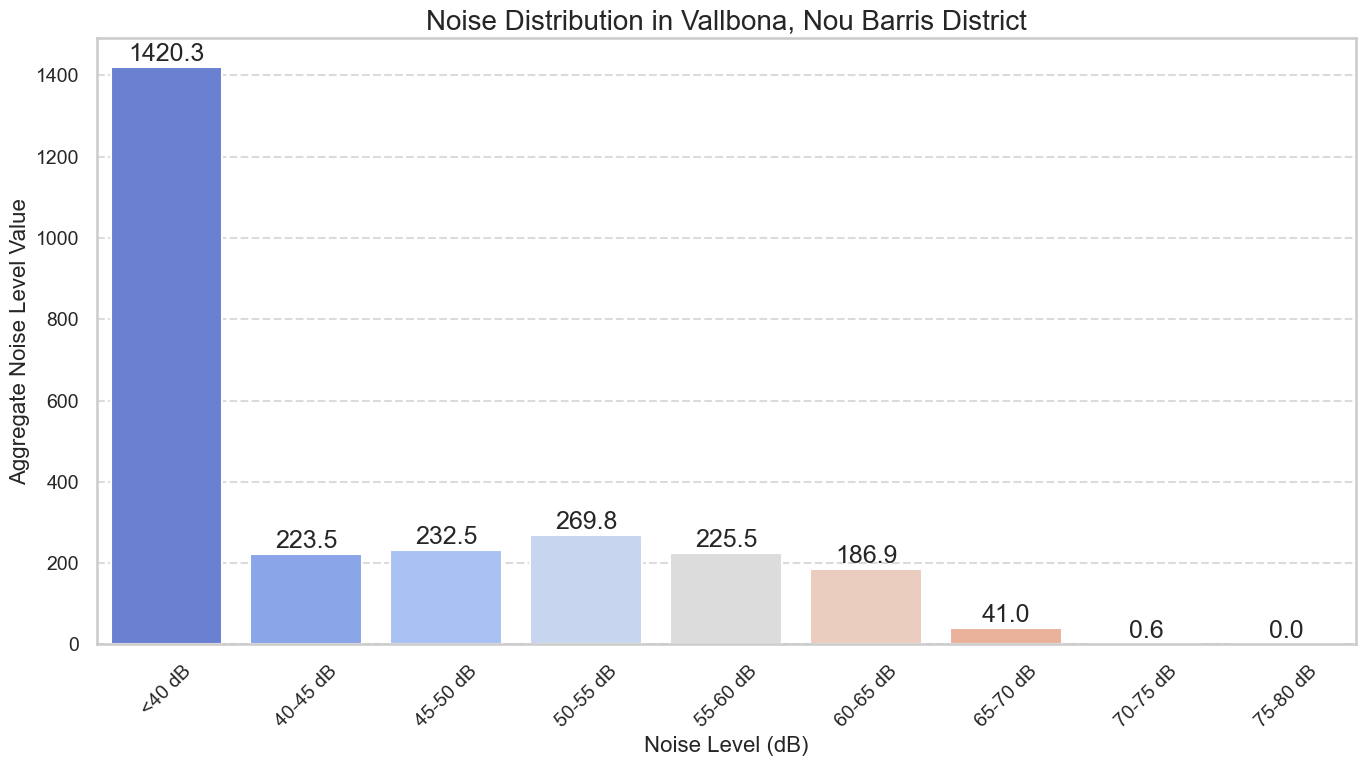

In [34]:
# Setting district and neighborhood of interest
district_name = 'Nou Barris'
neighborhood_name = 'Vallbona'
# Filtering the DataFrame for Vallbona neighborhood in the Nou Barris district
vallbona_noise = pivot_merged_surface_df[(pivot_merged_surface_df['Nom_Barri'] == neighborhood_name) & 
                                         (pivot_merged_surface_df['Nom_Districte'] == district_name)]

# Summing up the values of noise levels
noise_distribution = vallbona_noise[['<40 dB', '40-45 dB', '45-50 dB', '50-55 dB', '55-60 dB', '60-65 dB', '65-70 dB', '70-75 dB', '75-80 dB']].sum()

# Converting the Series to a DataFrame for plotting
noise_distribution_df = noise_distribution.reset_index()
noise_distribution_df.columns = ['Noise Range', 'Value']

# Setting the style of the plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Creating the bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Noise Range', y='Value', 
                      data=noise_distribution_df, 
                      palette='coolwarm')

# Customizing the plot
plt.title(f'Noise Distribution in {neighborhood_name}, {district_name} District', fontsize=20)
plt.xlabel('Noise Level (dB)', fontsize=16)
plt.ylabel('Aggregate Noise Level Value', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Annotating the bars with the data values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()



#### 1.6.2 Noise Level vs Rent Price<a id='1.6.2_plot2'></a>

Next we will be plotting a 2D plot the average noise level vs the average rent price per neigbourhood in a specified district. This plot has the intention to completely unify the two dataframes we have merged in previous steps.

We will be creating this plot by first filtering the data by a district of interest, then we will conduct an on-the-fly mean aggregation operation on each column representing the noise level and we'll also do the same for the price column. 

Then we will compute the average noise level within pur generated dataset holding the categories of noise levels. Each noise category is multiplied by a corresponding midpoint value before summing these products to get a numerator. These midpoint values represent the central value of each noise level category, incrementing by 5 starting from 35 up to 90. The sum of the noise levels for each row across the specified columns (second to tenth columns) forms the denominator of the weighted mean.

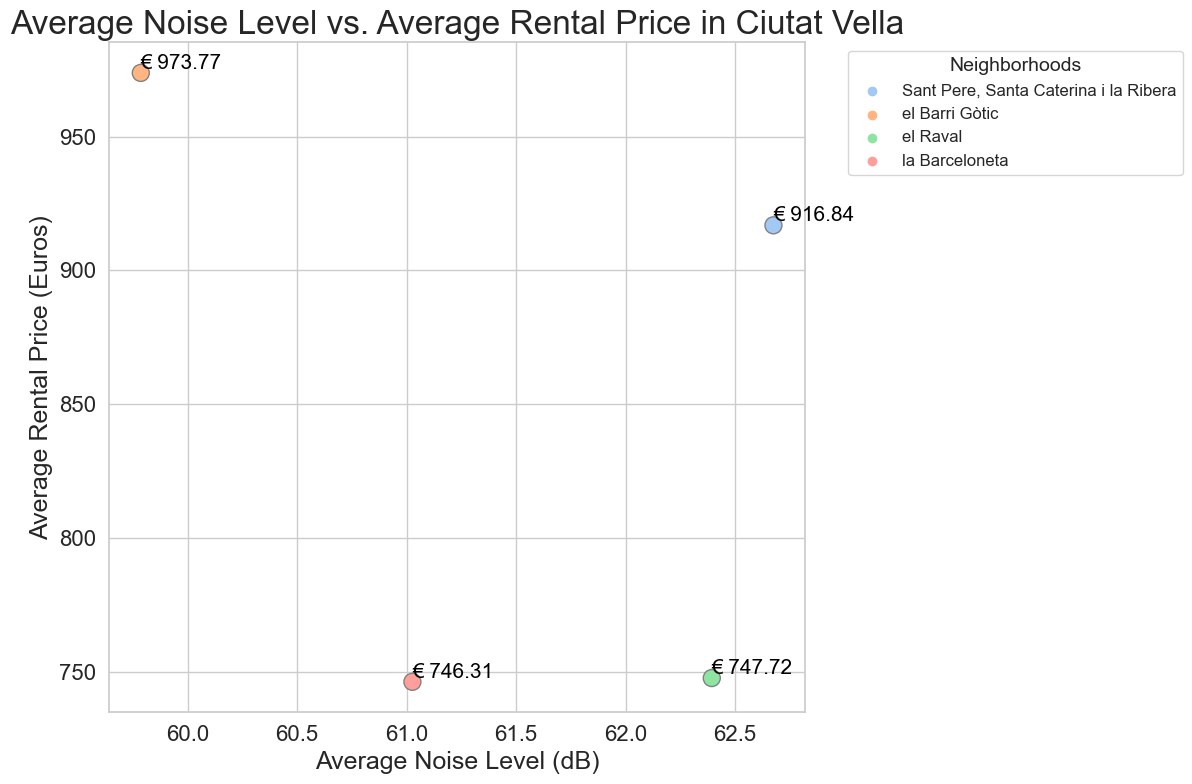

In [35]:
# Setting district of interest
district_name = 'Ciutat Vella'
district_data = pivot_merged_monthly_df[pivot_merged_monthly_df['Nom_Districte'] == district_name]

# Aggregating the data
agg_data = district_data.groupby(['Nom_Barri']).agg({
    '40-45 dB': 'mean',
    '45-50 dB': 'mean',
    '50-55 dB': 'mean',
    '55-60 dB': 'mean',
    '60-65 dB': 'mean',
    '65-70 dB': 'mean',
    '70-75 dB': 'mean',
    '75-80 dB': 'mean',
    '<40 dB': 'mean',
    'Preu': 'mean'
}).reset_index()

# Computing the average noise level using a weighted mean
agg_data['Average Noise'] = (
    agg_data.apply(lambda row: sum(row[noise_category] * midpoint for noise_category, midpoint in zip(agg_data.columns[1:10], range(35, 90, 5))) / sum(row[agg_data.columns[1:10]]), axis=1)
)

# Setting figure and style configuration
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", palette='coolwarm')

# Creating the scatter plot
scatter = sns.scatterplot(x='Average Noise', y='Preu', 
                          hue='Nom_Barri', 
                          data=agg_data, 
                          s=150, 
                          marker='o', 
                          edgecolor='gray', 
                          palette='pastel')

# Annotating the price values in each datapoint
for index, row in agg_data.iterrows():
     plt.text(x=row['Average Noise'], y=row['Preu'],
              s=f"€ {row['Preu']:,.2f}",  # This formats the price with two decimal places
              ha='left', va='bottom',
              fontsize=15, 
              color='black')

# Customizing the plot
plt.title(f'Average Noise Level vs. Average Rental Price in {district_name}', fontsize=24)
plt.xlabel('Average Noise Level (dB)', fontsize=18)
plt.ylabel('Average Rental Price (Euros)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Customizing the legend
legend = plt.legend(title='Neighborhoods', 
                    bbox_to_anchor=(1.05, 1), 
                    loc='upper left', 
                    fontsize='12')
legend.get_title().set_fontsize('14')

# Gridlines
plt.grid(True)

# Showing the plot
plt.tight_layout()
plt.show()

### 1.7 Principal Component Analysis (PCA)<a id='1.7_PCA'></a>

In this section, we will conduct a basic Principal Component Analysis on the data so we can be have statistical technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize, specially in datasets weith different sources of incormation like the ones we ar using in this project.

#### 1.7.1 Selecting Relevant Columns for PCA<a id='1.7.1_PCA1'></a>

In this section, we will refine our dataset by identifying and selecting columns that hold pertinent information relevant to our use case. We have already ensured in the preceding steps that our selected variables are free from missing values, a crucial prerequisite for conducting an effective Principal Component Analysis (PCA).

In [36]:
# Dropping columns from original DataFrame not needed for PCA
pivot_merged_monthly_pca_df = pivot_merged_monthly_df.drop(['Lloguer_mitja', 'Codi_Districte', 'Codi_Barri'], axis=1)

In our dataset preparation, we intentionally omitted the codes for districts and neighborhoods to prevent the PCA from inferring any hierarchical order from these categorical values, which do not possess a natural or meaningful sequence. Furthermore, we excluded additional columns that were deemed not to contribute significant explanatory variance for the PCA, ensuring that the analysis focuses solely on the most informative features.

#### 1.7.2 Dealing With Categorical and Numerical Features<a id='1.7.2_cat_num'></a>

In this section, we will prepare our dataset for PCA by appropriately processing both categorical and numerical features. For the categorical variables, we will implement one-hot encoding. This technique, executed using pandas' `get_dummies` function, converts categorical variables into a format amenable to PCA, transforming them into a set of binary variables. On the numerical side, we will select features based on their data type.

Once this encoding is complete, we will merge the one-hot encoded categorical data with the numerical feature set, resulting in a consolidated dataset ready for PCA analysis. This process ensures that the PCA is conducted on a fully numerical dataset, allowing for meaningful component extraction.

In [37]:
# Separating the categorical data
categorical_features = pivot_merged_monthly_pca_df.select_dtypes(include=['object'])

# One-hot encoding the categorical data
one_hot_encoded = pd.get_dummies(categorical_features)

# Combining the one-hot encoded columns with the numerical features
numerical_features = pivot_merged_monthly_pca_df.select_dtypes(include=['int64', 'float64'])
combined_features = pd.concat([numerical_features, one_hot_encoded], axis=1)

In [38]:
combined_features.head()

,Preu,Trimestre,40-45 dB,45-50 dB,50-55 dB,55-60 dB,60-65 dB,65-70 dB,70-75 dB,75-80 dB,...,Concepte_TOTAL_D,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E
7098,302.52,2,33.79,15.95,9.21,1.67,0.73,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
7099,302.52,2,34.45,21.39,10.80,1.60,1.45,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
7100,302.52,2,30.38,11.24,8.12,2.03,0.22,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
7101,302.52,2,12.98,2.54,1.59,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
7102,302.52,2,3.99,12.84,13.92,14.94,19.36,2.18,0.07,NaN,...,False,False,False,False,False,False,False,False,False,False


In [39]:
combined_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7098 entries, 7098 to 14195
Columns: 117 entries, Preu to Concepte_VIANANTS_E
dtypes: bool(106), float64(10), int64(1)
memory usage: 1.4 MB


In [40]:
# Imputting NaN values with zero for simplicity (Future work)
combined_features.fillna(0, inplace=True)

#### 1.7.3 Standarizing the Features<a id='1.7.3_stan_feat'></a>

Next, we will standardize all features to ensure a robust PCA. Standardization is an essential prerequisite for PCA, as the analysis is sensitive to the variances of the initial variables. It's crucial to standardize the entire combined feature set, rather than just the numerical ones, to provide each variable with equal weight in the PCA, facilitating the identification of true principal components.

In [41]:
# Standardizing the features
X = StandardScaler().fit_transform(combined_features)

#### 1.7.4 Performing the PCA and Plotting Principal Components<a id='1.7.4_PCA_comp'></a>

Finally, we will conduct the PCA and plot the principal components.

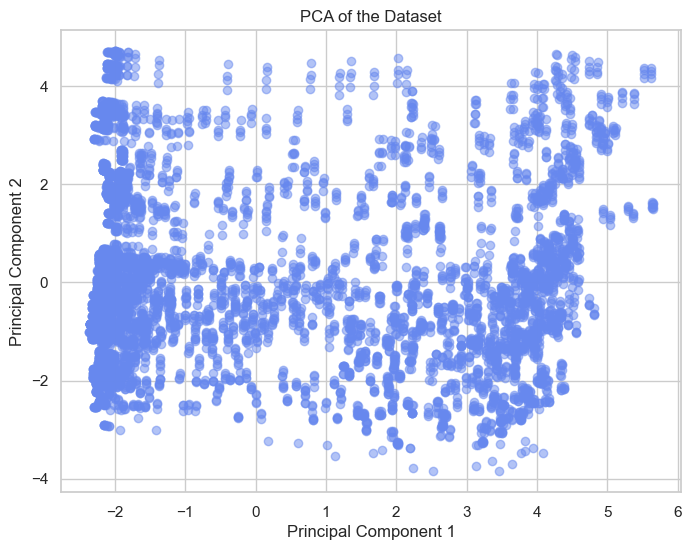

Explained variance ratio: [0.05454949 0.02562762 0.02104982 0.01875419]


In [42]:
# Performing PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Plotting the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

### 1.8 Analysis of PCA Plot<a id='1.8_PCA_ana'></a>

**Density of Points:** There is a dense cluster of points around the center of the plot, indicating that many data points have similar scores on both principal components.

Spread and Direction: The spread of points is more elongated along the horizontal axis (PC1) than the vertical axis (PC 2). This suggests that PC1 explains more variance in the dataset than PC2.

**Outliers:** There are points that are far from the main cluster, particularly along the first principal component. These could be considered outliers or they may represent unique or rare occurrences within the dataset.

The first component explains about 5.45% of the variance, while the second explains about 2.65%. However, the third and fourth components (not shown on the 2D plot) explain 2.11% and 1.88% respectively. Together, these four components explain roughly 11% of the total variance, which suggests that the dataset is quite complex and higher-dimensional, as a significant amount of variance remains unexplained by these components.

### 1.9 Future Work<a id='1.9_future_work'></a>

Overall, the PCA plot suggests a dataset with complex structure and potentially many features influencing the variability of the data points. It may be beneficial to look at the features selected for the PCA and watch out for many encodings in the categorical columns (resulting in 118 as of now), more principal components for a fuller understanding of the dataset's structure, or to consider other techniques to better capture the variance in the data, especially if the goal is dimensionality reduction or feature selection for further analysis or modeling.

Additionally, since pur data is separated by monthly fee and monthly fee per square meter in the `Preu` variable, it would be worth it to compute this analysis in both of the DataFrames and copare results.